# Final Project - Anirudh Sharma - ashar29

#  Monte Carlo simulation to address whether social distancing will help mitigate the spread of corona virus

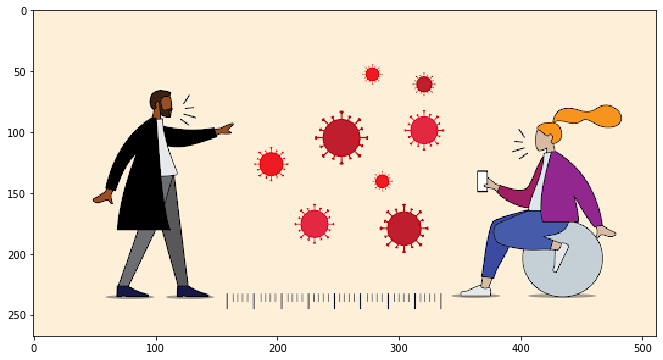

In [4]:
import os
os.chdir('C:\Second sem Uiuc\Programming_analytics\Final')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(12,6))
plt.imshow(mpimg.imread('Social_distanicng.png'))


Assumptions :

If a person comes within 6 metres of an infected person they will become infected -

https://theconversation.com/coronavirus-why-should-we-stay-1-5-metres-away-from-each-other-134029

https://www.samhealth.org/about-samaritan/news-search/2020/03/20/social-distancing

No person in the population sample is immune to the virus

Description :

There is a population sample of 1000 people in which initially only a single person is infected which means the initial infection rate in the population sample is 0.1 %. The model will calculate the infection rate at the end of two months for two scenarios:

1.) The people are moving freely around the area (150*150 square metre) every day for which numpy.random.randit function was used to assign people random locations across the space.

2.) In the second scenario people are only leaving there house or living area for buying essential items such as grocery and leaving there house every four days.

Incubation period : Defined as the time when the person is contagious and can spread the virus to others - 5 days

The age across the population comes from a normal distribution and the number of deaths per age group can be calculated by the respective probailities of death for each group.

The mean age of the population is considered to be 40 with a standard deviation of 15 for this model

References :

https://www.contagionlive.com/news/coronavirus-incubation-period-is-about-5-days-study-estimates
https://www.worldometers.info/coronavirus/coronavirus-age-sex-demographics/

<b> Basis of selecting a grid size of 150 *150 and a population of 1000 people </b>

<b> Area for the project in which the poulation resides = 22500 - square metere = 242187.98 square feet 
<b> On an average it can be assumed that average area occupied by a house is 900 square feet</b>
<b> Numer of household - 269 </b>
<b> On an average 3.70 person household </b>
    <b> Aprroximate sie of population for the area =1000 people </b>

In [62]:
import monte_carlo

In [63]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [64]:
test_set=dict()
test_set['age']=[]
test_set['x']=[]
test_set['y']=[]
test_set['xy']=[]
test_set['xy']=[]

for num,i in enumerate(range(1000)):
    test_set['age'].append(int(monte_carlo.to_str(np.random.normal(40,15,1)[0])))
    test_set['x'].append(int(monte_carlo.to_str(random.randint(1,150))))
    test_set['y'].append(int(monte_carlo.to_str(random.randint(1,150))))

test_set['condition']=['I']*1 + ['N/I']*999
test_set['xy']=list(zip(test_set['x'],test_set['y']))
del test_set['x']
del test_set['y']

### Creating a dataframe just to display the population information
df=pd.DataFrame(test_set)

In [65]:
df.head()

age        xy condition
0   16  (78, 37)         I
1    9   (9, 16)       N/I
2   45  (47, 30)       N/I
3   27  (54, 38)       N/I
4   48  (59, 90)       N/I

<b> Zero social distancing people moving around freely everyday -simulation for 2 months </b>

In [66]:
test_set_sd=copy.deepcopy(test_set)

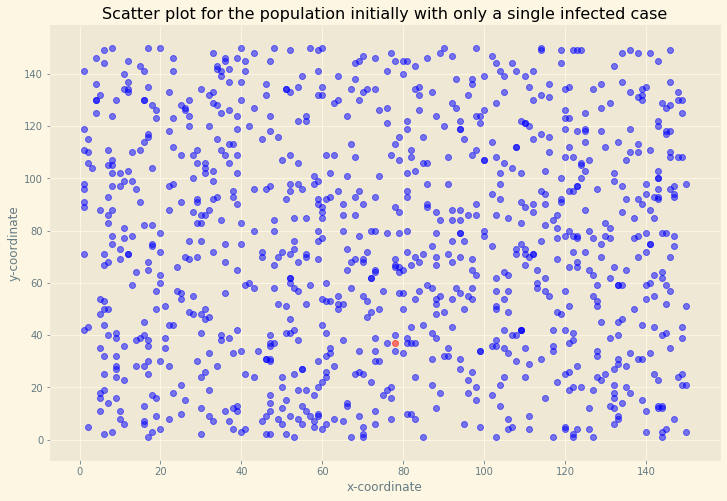

In [67]:
plt.figure(figsize=(12,8))
for i,j in enumerate(test_set['xy']):
    if test_set['condition'][i]=='I':
        plt.scatter(j[0],j[1],marker='o',c='red',alpha=0.5)
    else:
        plt.scatter(j[0],j[1],marker='o',c='blue',alpha=0.5)
plt.title('Scatter plot for the population initially with only a single infected case')
plt.ylabel('y-coordinate')
plt.xlabel('x-coordinate')
plt.style.use('Solarize_Light2')

<b> Initially we can see through the scatter plot that only a single person is infected by the virus which is displayed in red color </b>

<b> Lets see how the infection spread in a 2 month time period with and without social distancing </b>

<b> No social distancing implemented and all the people are moving freely around the plane </b>

In [68]:
infected_percentage={}
infected_percentage['day']=[1]
infected_percentage['number']=[0.1]
final_dict: Dict[str, Union[Union[List[Any], List[int]], Any]]= {'age': [], 'condition': [],'xy': []}
infected_percentage,final_dict=monte_carlo.no_social_distancing(infected_percentage,final_dict,test_set)

<b>Social distancing implemented people only going out for essential reasons like grocery purchasing etc once in 4 days</b>

In [69]:
infected_percentage_social_distancing={}
infected_percentage_social_distancing['day']=[1]
infected_percentage_social_distancing['number']=[0.1]
final_dict_sd: Dict[str, Union[Union[List[Any], List[int]], Any]]= {'age': [], 'condition': [],'xy': []}
infected_percentage_social_distancing,final_dict_sd=monte_carlo.social_distancing(infected_percentage_social_distancing,final_dict_sd,test_set_sd)

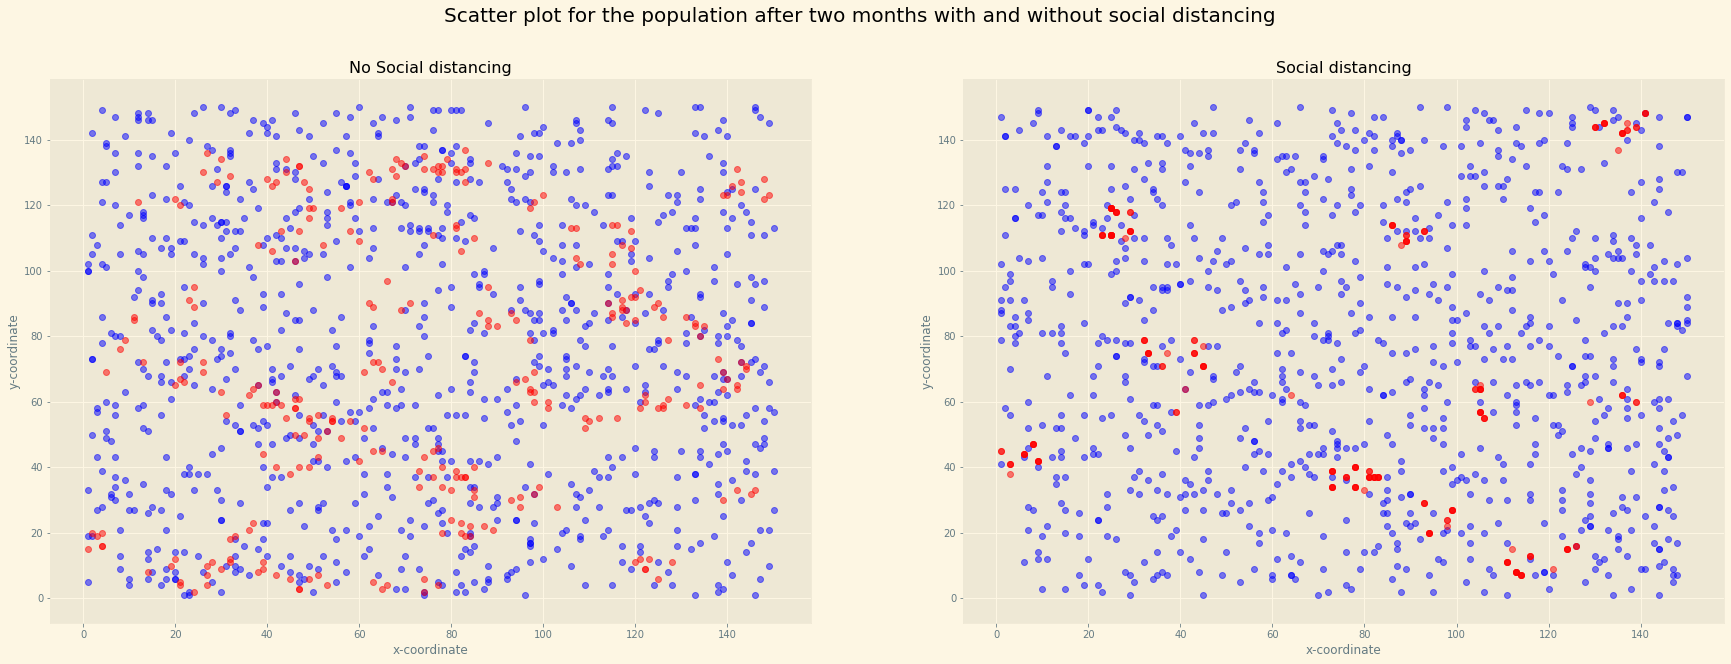

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(30,10))
for num in test_set['xy']:
    axes[0].scatter(num[0],num[1],marker='o',c='blue',alpha=0.5)
for num in final_dict['xy']:
    axes[0].scatter(num[0],num[1],marker='o',c='red',alpha=0.5)
for num in test_set_sd['xy']:
    axes[1].scatter(num[0],num[1],marker='o',c='blue',alpha=0.5)
for num in final_dict_sd['xy']:
    axes[1].scatter(num[0],num[1],marker='o',c='red',alpha=0.5)
axes[0].set_xlabel('x-coordinate')
axes[0].set_ylabel('y-coordinate')
axes[0].set_title('No Social distancing')
axes[1].set_xlabel('x-coordinate')
axes[1].set_ylabel('y-coordinate')
axes[1].set_title('Social distancing')
fig.suptitle('Scatter plot for the population after two months with and without social distancing',fontsize=20)
plt.style.use('Solarize_Light2')

<b> So this is how the spread of the virus happens in a 2 month period , it is clear that when there is no social distancing 
almost all the portions of the area are being affected by the virus, but when people avoid leaving there house apart from when they need 
any essential items, the spread of the virus only reaches specific locations </b>

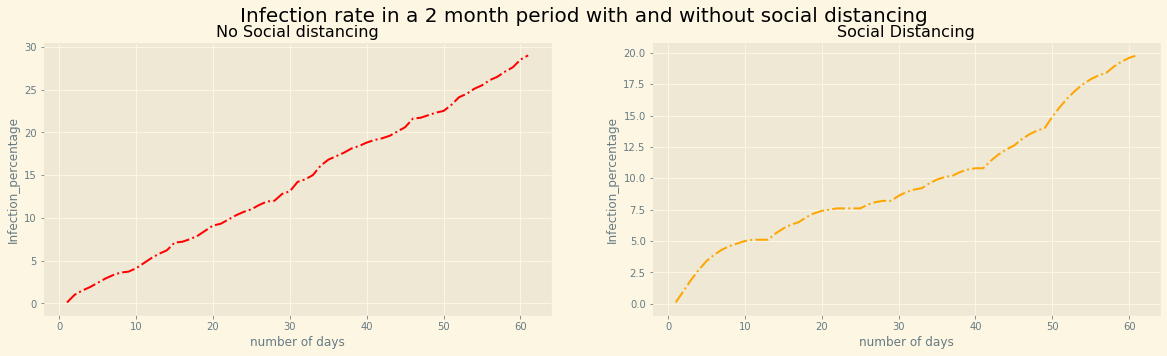

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].plot(infected_percentage['day'],infected_percentage['number'],linestyle='-.',c='red')
axes[0].set_xlabel('number of days')
axes[0].set_ylabel('Infection_percentage')
axes[0].set_title('No Social distancing')
axes[1].plot(infected_percentage_social_distancing['day'],infected_percentage_social_distancing['number'],linestyle='-.',c='orange')
axes[1].set_xlabel('number of days')
axes[1].set_ylabel('Infection_percentage')
axes[1].set_title('Social Distancing')
fig.suptitle('Infection rate in a 2 month period with and without social distancing',fontsize=20)
plt.style.use('Solarize_Light2')

<b> It can be seen that the virus spreads slowly when social distancing is applied as compared to no social distancing , this thing is important to note as the main problem with this virus is that not only it's deadly but hospitals get overwhelmed if a large number of cases become positive at once which increases the number of deaths as people are not able to recieve the treatment which is required to save their life </b>

<b> But these results are random and only consider a single trail , in order to prove the hypothesis let's run a number of simulations which will give us more concrete evidence </b>

# Monte carlo simulation 

<b> 100 simulations </b>

<b>No Social distancing  </b>

In [73]:
percentage_infected_2_months_no_sd=[]
infected_percentage={}
infected_percentage['day']=[1]
infected_percentage['number']=[0.1]
death_record_no_sd_100=[]
c=0
for l in range(100):
    test_set=dict()
    test_set['age']=[]
    test_set['x']=[]
    test_set['y']=[]
    test_set['xy']=[]
    test_set['xy']=[]

    for num,i in enumerate(range(1000)):
        test_set['age'].append(int(monte_carlo.to_str(np.random.normal(40,15,1)[0])))
        test_set['x'].append(int(monte_carlo.to_str(random.randint(1,150))))
        test_set['y'].append(int(monte_carlo.to_str(random.randint(1,150))))

    test_set['condition']=['I']*1 + ['N/I']*999
    test_set['xy']=list(zip(test_set['x'],test_set['y']))
    del test_set['x']
    del test_set['y']

    ### Creating a dataframe just to display the population information
    df=pd.DataFrame(test_set)
    
    a=0

    final_dict: Dict[str, Union[Union[List[Any], List[int]], Any]]= {'age': [], 'condition': [],'xy':[]}
    if c==0:
        test_set_sd=copy.deepcopy(test_set)
    delta=0
    monte_carlo.no_social_distancing(infected_percentage,final_dict,test_set)
    percentage_infected_2_months_no_sd.append(infected_percentage['number'][-1])
    infected_percentage={}
    infected_percentage['day']=[1]
    infected_percentage['number']=[0.1]
    c+=1
    death_record_no_sd_100.append(monte_carlo.death_recovery_calculator(final_dict))
    

<b> Simulation social distancing -100 simulations</b>

In [78]:
c=0
percentage_infected_2_months_sd=[]
infected_percentage_social_distancing={}
infected_percentage_social_distancing['day']=[1]
infected_percentage_social_distancing['number']=[0.1]
death_record_sd_100=[]
for l in range(100):
    test_set_sd=dict()
    test_set_sd['age']=[]
    test_set_sd['x']=[]
    test_set_sd['y']=[]
    test_set_sd['xy']=[]
    test_set_sd['xy']=[]

    for num,i in enumerate(range(1000)):
        test_set_sd['age'].append(int(monte_carlo.to_str(np.random.normal(40,15,1)[0])))
        test_set_sd['x'].append(int(monte_carlo.to_str(random.randint(1,150))))
        test_set_sd['y'].append(int(monte_carlo.to_str(random.randint(1,150))))

    test_set_sd['condition']=['I']*1 + ['N/I']*999
    test_set_sd['xy']=list(zip(test_set_sd['x'],test_set_sd['y']))
    del test_set_sd['x']
    del test_set_sd['y']

    ### Creating a dataframe just to display the population information
    df=pd.DataFrame(test_set_sd)

    a=0

    final_dict_sd: Dict[str, Union[Union[List[Any], List[int]], Any]]= {'age': [], 'condition': [],'xy':[]}

    delta=0
    monte_carlo.social_distancing(infected_percentage_social_distancing,final_dict_sd,test_set_sd)
    percentage_infected_2_months_sd.append(infected_percentage_social_distancing['number'][-1])
    infected_percentage_social_distancing={}
    infected_percentage_social_distancing['day']=[1]
    infected_percentage_social_distancing['number']=[0.1]
    c+=1
    death_record_sd_100.append(monte_carlo.death_recovery_calculator(final_dict))
#     print(death_record)

In [79]:
simulation_results_100={}
simulation_results_100['Social_distancing_infection_rate']=percentage_infected_2_months_sd
simulation_results_100['No_Social_distancing_infection_rate']=percentage_infected_2_months_no_sd
simulation_results_100=pd.DataFrame(simulation_results_100)
simulation_results_100.head()

Social_distancing_infection_rate  No_Social_distancing_infection_rate
0                              25.3                                 29.5
1                              18.4                                 30.0
2                              18.0                                 26.0
3                              18.8                                 29.1
4                              26.1                                 25.3

In [85]:
simulation_results_100.iplot(kind='box',colors=['green','red'],yTitle='Infection_percentage',title='Distribution of total population infected at the end of 100 simulations')

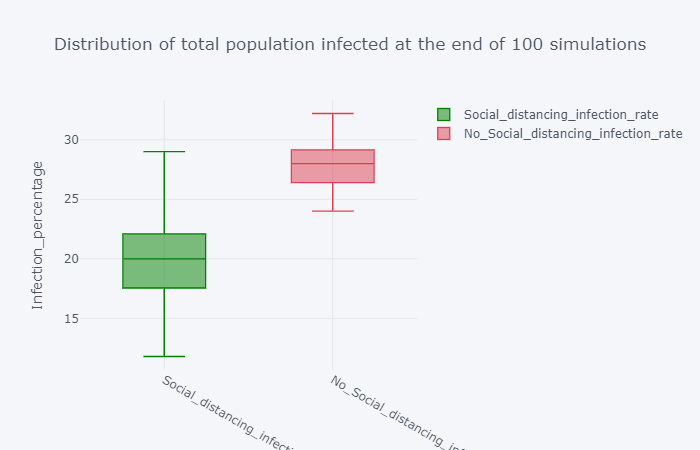

In [15]:
from IPython.display import Image
Image(filename='newplot (4).png') 

<b> This box plot clearly shows that although we have run only 100 simulations , the median infection rate after 2 months is 8% less when social distancing is applied <b>

In [86]:
death_record_no_sd_100=pd.DataFrame(death_record_no_sd_100)
death_record_sd_100=pd.DataFrame(death_record_sd_100)

In [113]:
death_record_no_sd_100.sum().iplot(kind='bar',title='100 Monte carlo simulations mortality rate by Age group -No social distancing',xTitle='Age group',yTitle='Number of deaths across simulations',
                                  colors='darkblue')

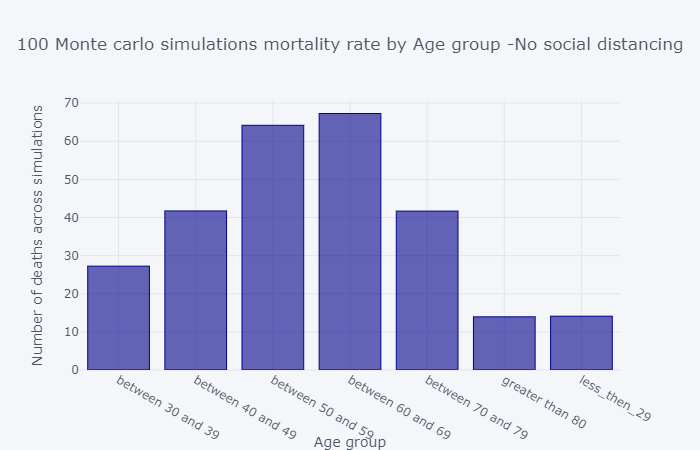

In [14]:
from IPython.display import Image
Image(filename='newplot (5).png') 

In [114]:
death_record_sd_100.sum().iplot(kind='bar',title='100 Monte carlo simulations mortality rate by Age group -Social distancing',xTitle='Age group',yTitle='Number of deaths across simulations',
                                  colors='darkblue')

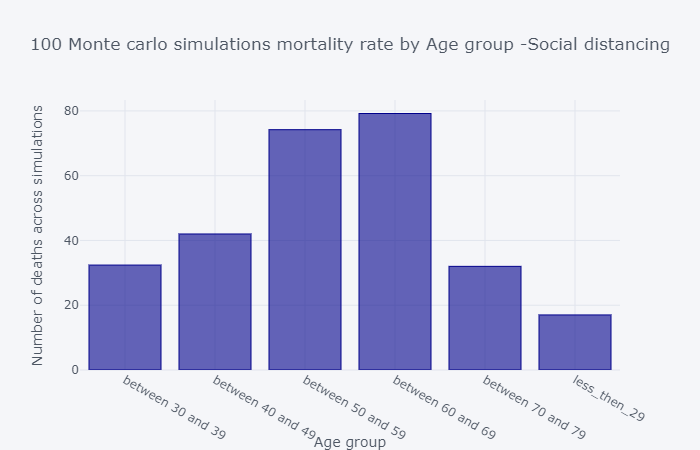

In [13]:
from IPython.display import Image
Image(filename='newplot (6).png') 

<b> The bar graph shows us the number of people dying across the simulations in both the cases , it can be seen that on an average the deaths between the age group above 40 is significantly reduced when social distacning is applied which is expected as people in these age group have a higher probabiltiy to die <b>

<b> We will run a larger number of simulatiions to see whether the results are converging or not </b>

# 1000 Simulations

<b> No social distancing </b>

In [115]:
percentage_infected_2_months_no_sd=[]
infected_percentage={}
infected_percentage['day']=[1]
infected_percentage['number']=[0.1]
death_record_no_sd_1000=[]
c=0
for l in range(1000):
    test_set=dict()
    test_set['age']=[]
    test_set['x']=[]
    test_set['y']=[]
    test_set['xy']=[]
    test_set['xy']=[]

    for num,i in enumerate(range(1000)):
        test_set['age'].append(int(monte_carlo.to_str(np.random.normal(40,15,1)[0])))
        test_set['x'].append(int(monte_carlo.to_str(random.randint(1,150))))
        test_set['y'].append(int(monte_carlo.to_str(random.randint(1,150))))

    test_set['condition']=['I']*1 + ['N/I']*999
    test_set['xy']=list(zip(test_set['x'],test_set['y']))
    del test_set['x']
    del test_set['y']

    ### Creating a dataframe just to display the population information
    df=pd.DataFrame(test_set)
    a=0

    final_dict: Dict[str, Union[Union[List[Any], List[int]], Any]]= {'age': [], 'condition': [],'xy':[]}
    if c==0:
        test_set_sd=copy.deepcopy(test_set)
    delta=0
    monte_carlo.no_social_distancing(infected_percentage,final_dict,test_set)
    percentage_infected_2_months_no_sd.append(infected_percentage['number'][-1])
    infected_percentage={}
    infected_percentage['day']=[1]
    infected_percentage['number']=[0.1]
    c+=1
    death_record_no_sd_1000.append(monte_carlo.death_recovery_calculator(final_dict))

<b> Social distancing </b>

In [116]:
c=0
percentage_infected_2_months_sd=[]
infected_percentage_social_distancing={}
infected_percentage_social_distancing['day']=[1]
infected_percentage_social_distancing['number']=[0.1]
death_record_sd_1000=[]
for l in range(1000):
    test_set_sd=dict()
    test_set_sd['age']=[]
    test_set_sd['x']=[]
    test_set_sd['y']=[]
    test_set_sd['xy']=[]
    test_set_sd['xy']=[]

    for num,i in enumerate(range(1000)):
        test_set_sd['age'].append(int(monte_carlo.to_str(np.random.normal(40,15,1)[0])))
        test_set_sd['x'].append(int(monte_carlo.to_str(random.randint(1,150))))
        test_set_sd['y'].append(int(monte_carlo.to_str(random.randint(1,150))))

    test_set_sd['condition']=['I']*1 + ['N/I']*999
    test_set_sd['xy']=list(zip(test_set_sd['x'],test_set_sd['y']))
    del test_set_sd['x']
    del test_set_sd['y']

    ### Creating a dataframe just to display the population information
    df=pd.DataFrame(test_set_sd)

    a=0

    final_dict_sd: Dict[str, Union[Union[List[Any], List[int]], Any]]= {'age': [], 'condition': [],'xy':[]}

    delta=0
    monte_carlo.social_distancing(infected_percentage_social_distancing,final_dict_sd,test_set_sd)
    percentage_infected_2_months_sd.append(infected_percentage_social_distancing['number'][-1])
    infected_percentage_social_distancing={}
    infected_percentage_social_distancing['day']=[1]
    infected_percentage_social_distancing['number']=[0.1]
    c+=1
    death_record_sd_1000.append(monte_carlo.death_recovery_calculator(final_dict))
#     print(death_record)

In [117]:
simulation_results_1000={}
simulation_results_1000['Social_distancing_infection_rate']=percentage_infected_2_months_sd
simulation_results_1000['No_Social_distancing_infection_rate']=percentage_infected_2_months_no_sd
simulation_results_1000=pd.DataFrame(simulation_results_1000)
simulation_results_1000.head()

Social_distancing_infection_rate  No_Social_distancing_infection_rate
0                              17.2                                 32.2
1                              15.5                                 27.5
2                              19.8                                 25.6
3                              19.1                                 28.9
4                              18.6                                 29.0

In [118]:
simulation_results_1000.head()

Social_distancing_infection_rate  No_Social_distancing_infection_rate
0                              17.2                                 32.2
1                              15.5                                 27.5
2                              19.8                                 25.6
3                              19.1                                 28.9
4                              18.6                                 29.0

In [119]:
simulation_results_1000.iplot(kind='box',colors=['green','red'],yTitle='Infection_percentage',title='Distribution of total population infected at the end of 1000 simulations')
                               

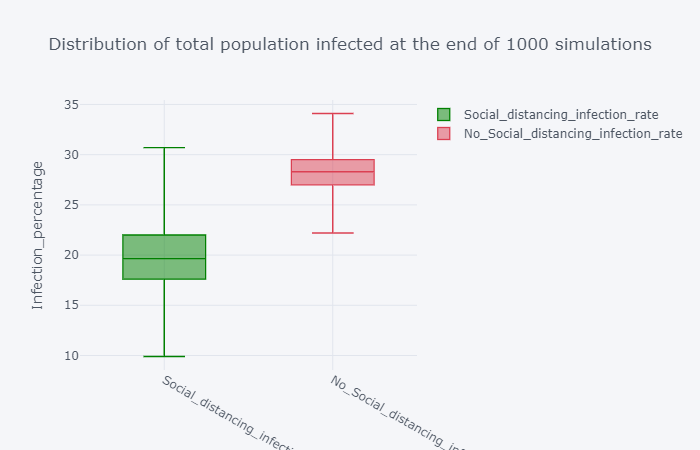

In [16]:
from IPython.display import Image
Image(filename='newplot.png') 

<b> There is a similar plot and the results seem to converge but just to confirm lets try to run a simulation with 10000 trails </b>

In [120]:
death_record_no_sd_1000=pd.DataFrame(death_record_no_sd_1000)
death_record_sd_1000=pd.DataFrame(death_record_sd_1000)

In [121]:
death_record_no_sd_1000.sum().iplot(kind='bar',title='1000 Monte carlo simulations mortality rate by Age group -No social distancing',xTitle='Age group',yTitle='Number of deaths across simulations',
                                  colors='brown')

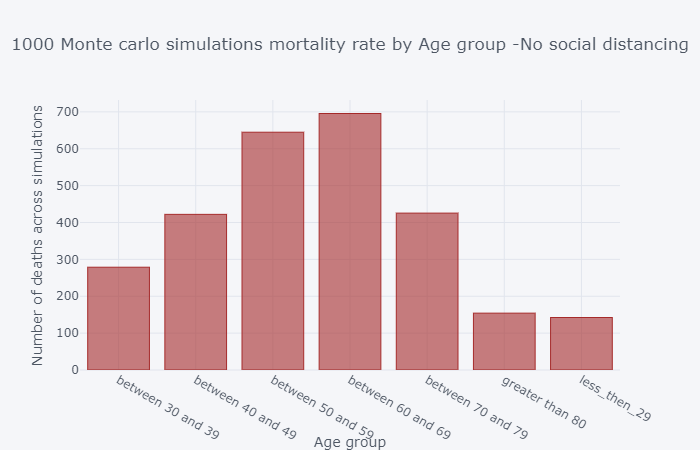

In [17]:
from IPython.display import Image
Image(filename='newplot (1).png') 

In [122]:
death_record_sd_1000.sum().iplot(kind='bar',title='1000 Monte carlo simulations mortality rate by Age group -Social distancing',xTitle='Age group',yTitle='Number of deaths across simulations',
                                  colors='brown')

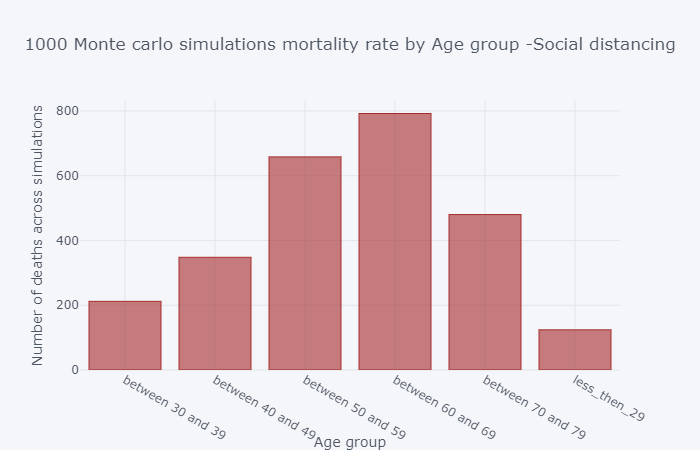

In [18]:
from IPython.display import Image
Image(filename='newplot (2).png') 

# 10000 Simulations

<b> No social distancing </b>


In [123]:
percentage_infected_2_months_no_sd=[]
infected_percentage={}
infected_percentage['day']=[1]
infected_percentage['number']=[0.1]
death_record_no_sd_10000=[]
c=0
for l in range(10000):
    test_set=dict()
    test_set['age']=[]
    test_set['x']=[]
    test_set['y']=[]
    test_set['xy']=[]
    test_set['xy']=[]

    for num,i in enumerate(range(1000)):
        test_set['age'].append(int(monte_carlo.to_str(np.random.normal(40,15,1)[0])))
        test_set['x'].append(int(monte_carlo.to_str(random.randint(1,150))))
        test_set['y'].append(int(monte_carlo.to_str(random.randint(1,150))))

    test_set['condition']=['I']*1 + ['N/I']*999
    test_set['xy']=list(zip(test_set['x'],test_set['y']))
    del test_set['x']
    del test_set['y']

    ### Creating a dataframe just to display the population information
    df=pd.DataFrame(test_set)
    a=0

    final_dict: Dict[str, Union[Union[List[Any], List[int]], Any]]= {'age': [], 'condition': [],'xy':[]}
    if c==0:
        test_set_sd=copy.deepcopy(test_set)
    delta=0
    monte_carlo.no_social_distancing(infected_percentage,final_dict,test_set)
    percentage_infected_2_months_no_sd.append(infected_percentage['number'][-1])
    infected_percentage={}
    infected_percentage['day']=[1]
    infected_percentage['number']=[0.1]
    c+=1
    death_record_no_sd_10000.append(monte_carlo.death_recovery_calculator(final_dict))
    

<b> Social distancing </b>

In [127]:
c=0
percentage_infected_2_months_sd=[]
infected_percentage_social_distancing={}
infected_percentage_social_distancing['day']=[1]
infected_percentage_social_distancing['number']=[0.1]
death_record_sd_10000=[]
for l in range(10000):
    test_set_sd=dict()
    test_set_sd['age']=[]
    test_set_sd['x']=[]
    test_set_sd['y']=[]
    test_set_sd['xy']=[]
    test_set_sd['xy']=[]

    for num,i in enumerate(range(1000)):
        test_set_sd['age'].append(int(monte_carlo.to_str(np.random.normal(40,15,1)[0])))
        test_set_sd['x'].append(int(monte_carlo.to_str(random.randint(1,150))))
        test_set_sd['y'].append(int(monte_carlo.to_str(random.randint(1,150))))

    test_set_sd['condition']=['I']*1 + ['N/I']*999
    test_set_sd['xy']=list(zip(test_set_sd['x'],test_set_sd['y']))
    del test_set_sd['x']
    del test_set_sd['y']

    ### Creating a dataframe just to display the population information
    df=pd.DataFrame(test_set_sd)

    a=0

    final_dict_sd: Dict[str, Union[Union[List[Any], List[int]], Any]]= {'age': [], 'condition': [],'xy':[]}

    delta=0
    monte_carlo.social_distancing(infected_percentage_social_distancing,final_dict_sd,test_set_sd)
    percentage_infected_2_months_sd.append(infected_percentage_social_distancing['number'][-1])
    infected_percentage_social_distancing={}
    infected_percentage_social_distancing['day']=[1]
    infected_percentage_social_distancing['number']=[0.1]
    c+=1
    death_record_sd_10000.append(monte_carlo.death_recovery_calculator(final_dict))
#     print(death_record)

In [128]:
simulation_results_10000={}
simulation_results_10000['Social_distancing_infection_rate']=percentage_infected_2_months_sd
simulation_results_10000['No_Social_distancing_infection_rate']=percentage_infected_2_months_no_sd
simulation_results_10000=pd.DataFrame(simulation_results_10000)
simulation_results_10000.head()

Social_distancing_infection_rate  No_Social_distancing_infection_rate
0                              18.4                                 29.5
1                              19.3                                 26.5
2                              19.2                                 27.6
3                              22.2                                 31.3
4                              23.8                                 29.8

In [129]:
simulation_results_10000.iplot(kind='box',colors=['green','red'],yTitle='Infection_percentage',title='Distribution of total population infected at the end of 10000 simulations')

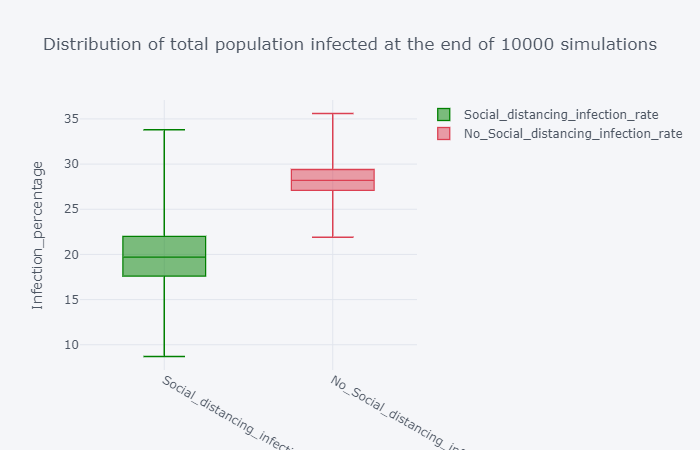

In [19]:
from IPython.display import Image
Image(filename='newplot (3).png') 

<b> Now , it's clear that the median of the social distancing scenario is almost 10% less as comapred to the non-social distacning case , another interesting thing to note is that among these 10000 simulations there is a case in social distanicng when only 87 people get infected after 2 months but when social distancing is avoided at minimum 220 people are getting affected </b>

<b> On the basis of this Monte-Carlo simulation we can conclude that social distancing infact mitigates the spread of corona virus or in general any contagious disease </b>

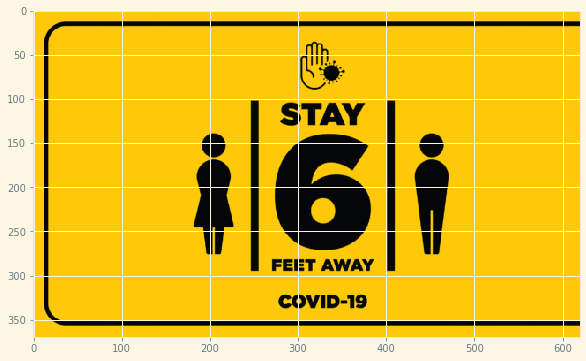

In [155]:
plt.figure(figsize=(12,6))
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('Corona-stay-away-620x370.png'))

In [130]:
death_record_no_sd_10000=pd.DataFrame(death_record_no_sd_10000)
death_record_sd_10000=pd.DataFrame(death_record_sd_10000)

In [131]:
death_record_no_sd_10000.sum().iplot(kind='bar',title='10000 Monte carlo simulations mortality rate by Age group -No social distancing',xTitle='Age group',yTitle='Number of deaths across simulations',
                                  colors='magenta')

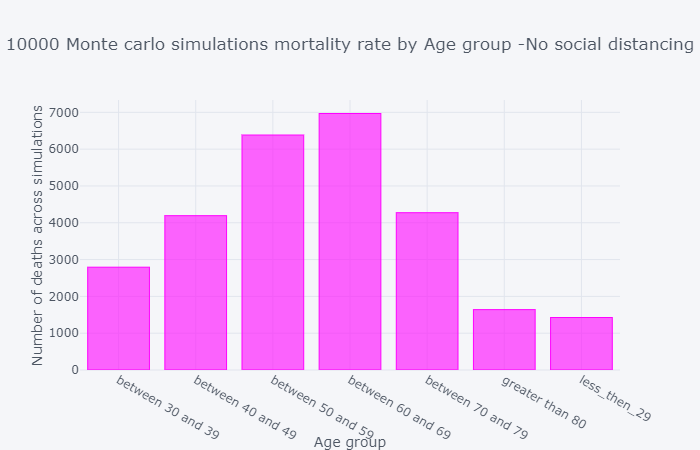

In [21]:
from IPython.display import Image
Image(filename='newplot (7).png') 

In [ ]:
death_record_sd_10000.sum().iplot(kind='bar',title='10000 Monte carlo simulations mortality rate by Age group -Social distancing',xTitle='Age group',yTitle='Number of deaths across simulations',
                                  colors='magenta')

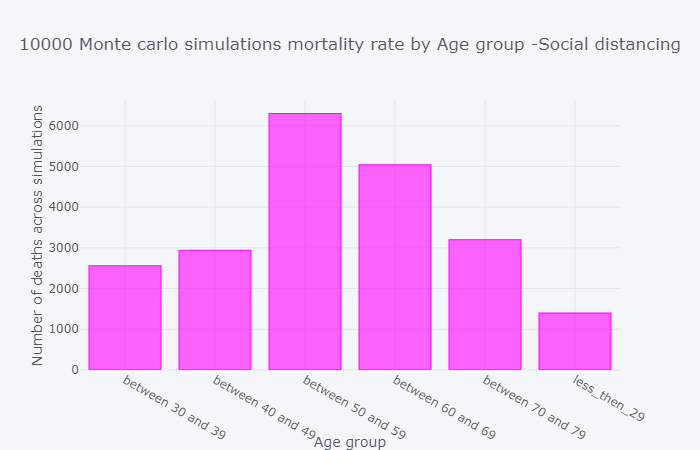

In [22]:
from IPython.display import Image
Image(filename='newplot (8).png') 